In [1]:
from ECOv002_CMR import ECOSTRESS_CMR_search, download_file, GranuleID, download_ECOSTRESS_granule
from AquaSEBS import water_heat_flux

[2025-09-30 15:01:34 INFO] SRTM working directory: ~/data/NASADEM
[2025-09-30 15:01:34 INFO] SRTM download directory: ~/data/NASADEM
[2025-09-30 15:01:34 INFO] SRTM download directory: ~/data/NASADEM


In [2]:
aquisition_date = "2024-10-22"
orbit = 35698
scene = 14
tile = "11SPS"

In [3]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=orbit,
    scene=scene,
    tile=tile,
    aquisition_date=aquisition_date
)

L2T_LSTE_granule

[2025-09-30 15:01:36 INFO] file already downloaded: ~/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_water.tif
[2025-09-30 15:01:36 INFO] file already downloaded: ~/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_cloud.tif
[2025-09-30 15:01:36 INFO] file already downloaded: ~/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_view_zenith.tif
[2025-09-30 15:01:36 INFO] file already downloaded: ~/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_height.tif
[2025-09-30 15:01:36 INFO] file already downloaded: ~/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_QC.tif
[2025-09-30 15:01:36 INFO] file

L2TLSTE("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

[2025-09-30 15:01:36 INFO] started reading L2T_LSTE water: /Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_water.tif
[2025-09-30 15:01:36 INFO] finished reading L2T_LSTE water (0.02s)
[2025-09-30 15:01:36 INFO] started reading L2T_LSTE LST: /Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_LST.tif
[2025-09-30 15:01:36 INFO] finished reading L2T_LSTE LST (0.02s)
[2025-09-30 15:01:36 INFO] started reading L2T_LSTE cloud: /Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01_cloud.tif
[2025-09-30 15:01:36 INFO] finished reading L2T_LSTE cloud (0.01s)


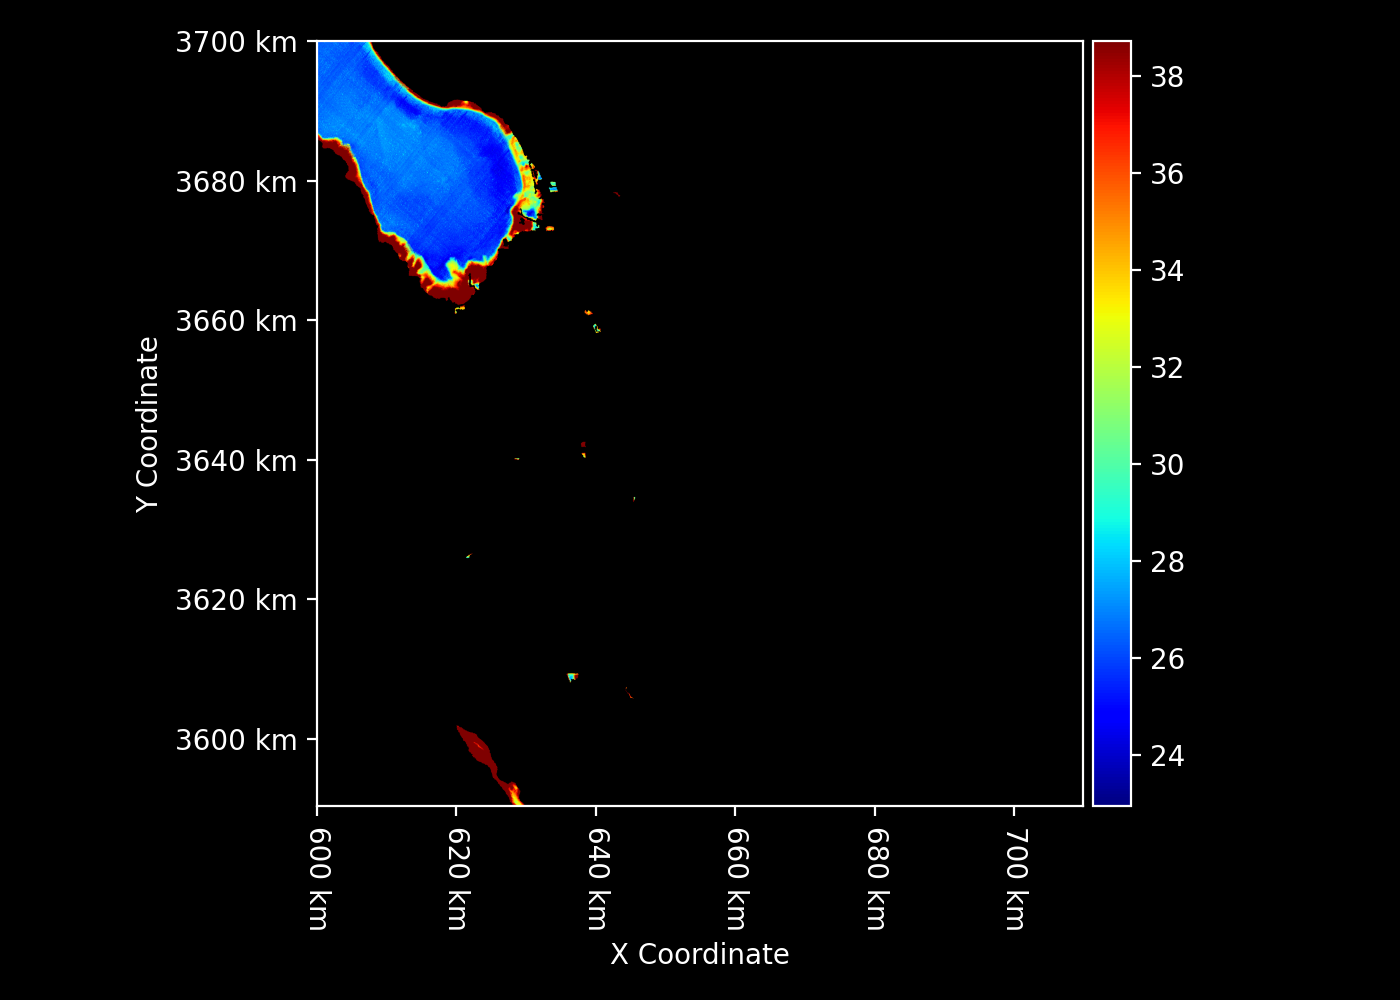

In [4]:
WST_C = L2T_LSTE_granule.WST_C
WST_C

In [5]:
geometry = L2T_LSTE_granule.geometry
geometry

{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [6]:
time_UTC = L2T_LSTE_granule.time_UTC
time_UTC

datetime.datetime(2024, 10, 22, 18, 36, 27)

[2025-09-30 15:01:36 INFO] variable WST_C min: 22.930 mean: 28.771 max: 45.290 nan: 93.92% (nan)
[2025-09-30 15:01:36 INFO] loading swb: zip:///Users/halverso/data/NASADEM/NASADEM_HGT_n32w115.zip!/n32w115.swb
[2025-09-30 15:01:36 INFO] loading swb: zip:///Users/halverso/data/NASADEM/NASADEM_HGT_n32w116.zip!/n32w116.swb
[2025-09-30 15:01:37 INFO] loading swb: zip:///Users/halverso/data/NASADEM/NASADEM_HGT_n33w115.zip!/n33w115.swb
[2025-09-30 15:01:37 INFO] loading swb: zip:///Users/halverso/data/NASADEM/NASADEM_HGT_n33w116.zip!/n33w116.swb
[2025-09-30 15:01:37 INFO] variable water (bool) with [False  True] unique values
[2025-09-30 15:01:37 INFO] * False: 2309293
[2025-09-30 15:01:37 INFO] * True: 149331
[2025-09-30 15:01:37 INFO] retrieving Ta from GEOS-5 FP tavg1_2d_slv_Nx T2M for 2024-10-22 18:36 UTC
[2025-09-30 15:01:37 INFO] searching GEOS-5 FP tavg1_2d_slv_Nx at 2024-10-22 18:36:27 UTC
[2025-09-30 15:01:37 INFO] interpolating GEOS-5 FP tavg1_2d_slv_Nx T2M from 2024-10-22 18:30 UTC

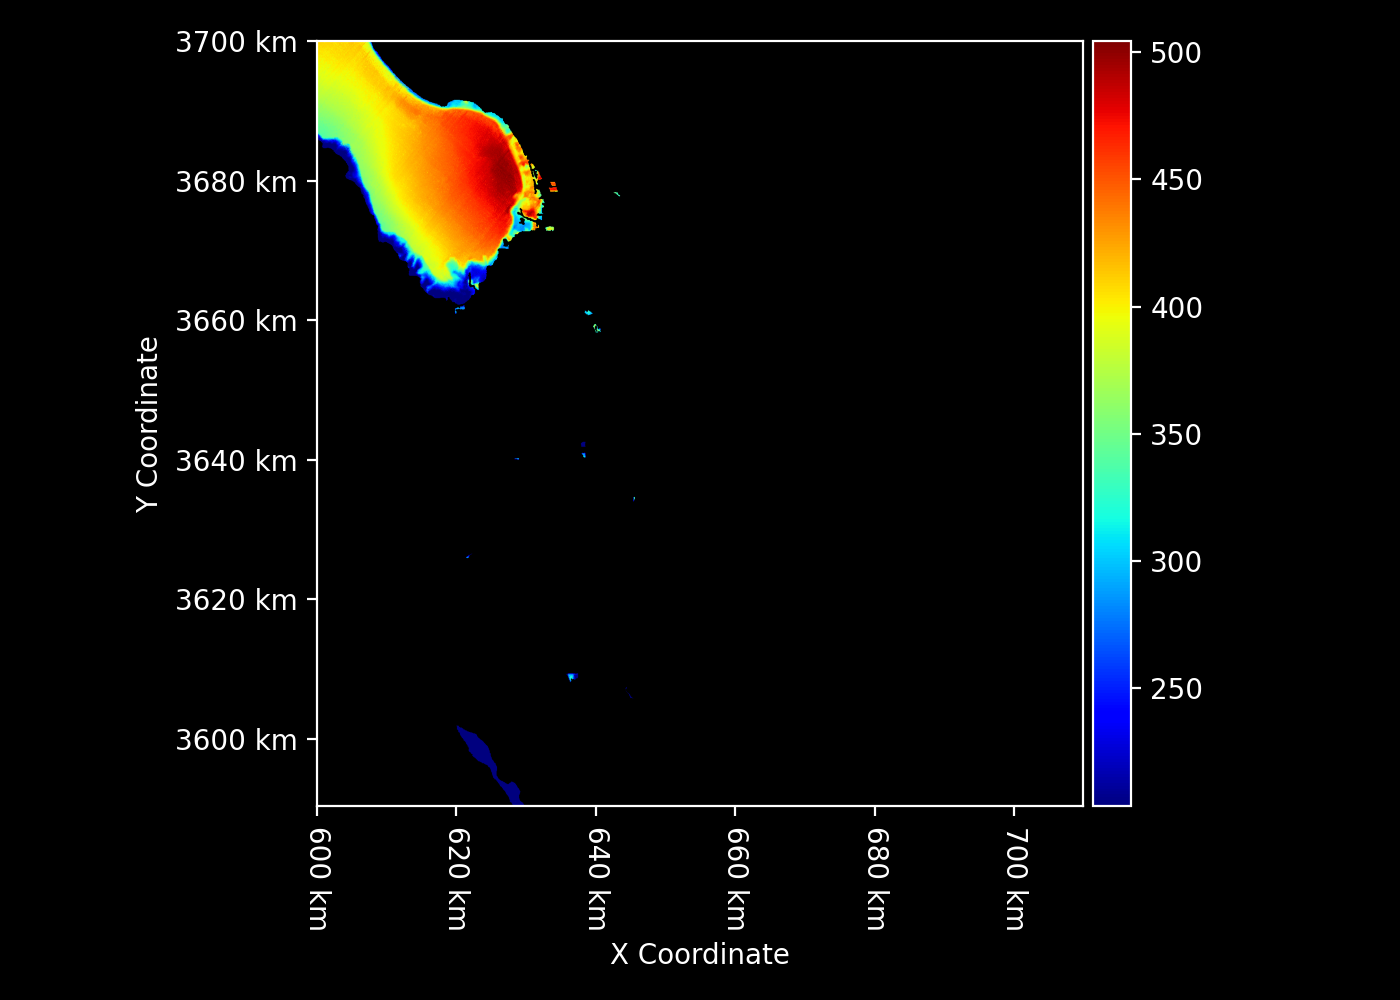

In [7]:
water_heat_flux_results = water_heat_flux(
    WST_C=WST_C,
    geometry=geometry,
    time_UTC=time_UTC
)
    
W_Wm2 = water_heat_flux_results["W_Wm2"]
W_Wm2